In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import os
import scipy.stats as stats            # Basic package for basic univariate regressions
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Historical Analysis

From the trends found in the 'Data-Analysis' file, we'll see when the same trends appeared concurrently since 1985.

To gather such data, files were manually downloaded from the FRED website and investing.com

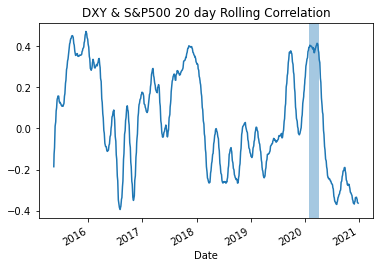

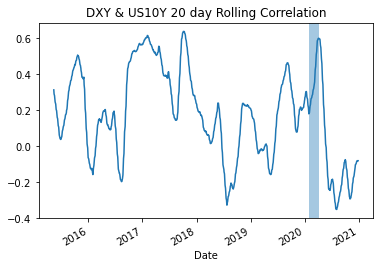

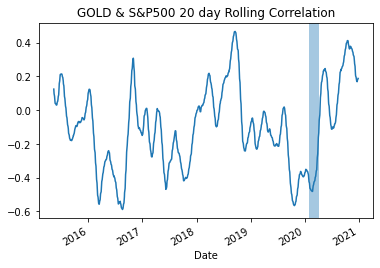

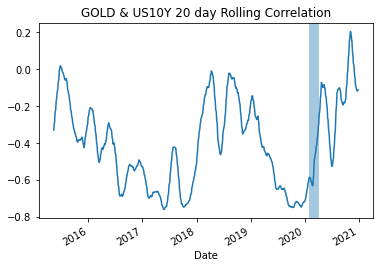

In [7]:
meta = pd.read_csv('data.csv',index_col = [0],parse_dates = True)
meta.rename(columns = {'DGS10':'US10Y','DGS2':'US2Y','DGS30':'US30Y'}, inplace = True)
metapct = meta.pct_change()[1:].astype(float)
metapct.replace([np.inf, -np.inf], 0,inplace=True)
metapct.replace([np.nan],0,inplace=True)
c = [['DXY','S&P500'],['DXY','US10Y'],['GOLD','S&P500'],['GOLD','US10Y']]
for item in c:   
    corr = metapct[item[0]].rolling(20).corr(metapct[item[1]])
    corr = corr.rolling(window = 40).mean()
    corr.plot()
    plt.axvline('2020-03-02',linewidth=10,alpha=0.4)
    plt.title(f'{item[0]} & {item[1]} 20 day Rolling Correlation',fontsize=12)
    plt.show()

In [12]:
datan = metapct[['GOLD','S&P500','DXY','US10Y']].tail(648)
dataj = meta[['GOLD','S&P500','DXY','US10Y']].tail(649)
US10Y = pd.read_csv('US10Y.csv', index_col=[0], parse_dates=True)
US10Y = US10Y[US10Y != '.']
US10Y = US10Y.astype(float)
gold = pd.read_csv('gold.csv', index_col=[0], parse_dates=True,thousands=',')
sp = pd.read_csv('s&p.csv', index_col=[0], parse_dates=True,thousands=',')
dxy = pd.read_csv('dxy.csv', index_col=[0], parse_dates=True,thousands=',')
data = pd.concat([gold,sp,dxy,US10Y],axis=1)
data = data.head(10008)
data = data.dropna()
datapct = data.pct_change()[1:].astype(float)
data.replace([np.inf, -np.inf], 0,inplace=True)
datapct = datapct.dropna()
datapct.replace([np.nan],0,inplace=True)
datapct.replace([np.inf, -np.inf], 0,inplace=True)
data.columns = ['GOLD','S&P500','DXY','US10Y']
datak = data.append(dataj)
datapct.columns = ['GOLD','S&P500','DXY','US10Y']
datat = datapct.append(datan)
columns = ['GOLD','S&P500','DXY','US10Y']
for s in columns:
    for t in columns:
        if s != t:
            corr = datat[s].rolling(20).corr(datat[t])
            corr = corr.rolling(window = 40).mean()
            datat[s+t] = corr
rc = datat[['DXYS&P500','DXYUS10Y','S&P500GOLD','GOLDUS10Y']]
rc['PostCovid'] = 0
for num in range(len(datat)):
    if rc['S&P500GOLD'][num] > 0:
        if rc['DXYUS10Y'][num] < 0:
            if rc['GOLDUS10Y'][num] > 0:
                if rc['DXYS&P500'][num] < 0:
                      rc['PostCovid'][num] = 1
dates = rc.index[rc['PostCovid'] == True].tolist()

Plot periods where the four trends were present compared with the dollar index and US 10 year yields

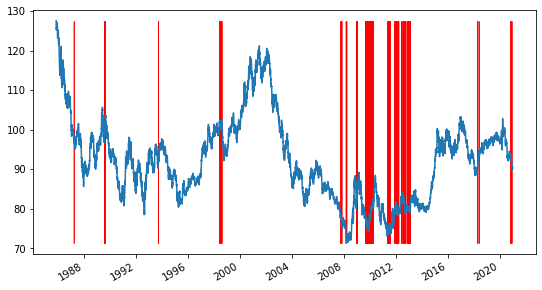

In [14]:
datak['DXY'].plot(figsize=(9,5))
plt.vlines(x = dates,ymin = min(datak['DXY']),ymax = max(data['DXY']),linewidth=1,alpha=0.4,color='Red')

Text(0, 0.5, 'Percent')

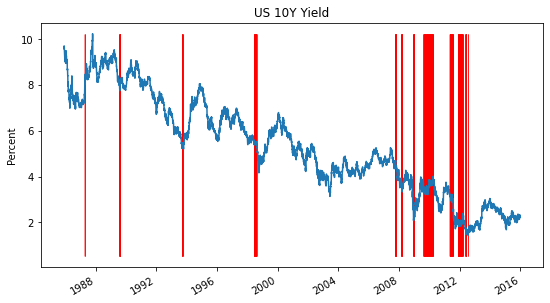

In [15]:
ax = datak['US10Y'][:'2016-01-04'].plot(figsize=(9,5))
plt.vlines(x = dates[:500],ymin = min(datak['US10Y']),ymax = max(datak['US10Y']),linewidth=1,alpha=0.4, color = 'red')
plt.title('US 10Y Yield',fontsize=12)
ax.set_ylabel('Percent')

In [16]:
rc['PostCovid'].replace(0,float('nan'),inplace = True)
predates = ['1987-04-16','1989-08-18','1993-09-20','1998-08-12']
df = pd.DataFrame()
df['1987'] = ((datak['DXY']['1987-04-16':].head(300)/datak['DXY']['1987-04-16'])*100-100).values
df['1989'] = ((datak['DXY']['1989-08-18':].head(300)/datak['DXY']['1989-08-18'])*100-100).values
df['1993'] = ((datak['DXY']['1993-09-20':].head(300)/datak['DXY']['1993-09-20'])*100-100).values
df['1998'] = ((datak['DXY']['1998-08-12':].head(300)/datak['DXY']['1998-08-12'])*100-100).values

Plot changes in the dollar index and bond yields for the 300-day periods after the trends ended

Text(0, 0.5, '% Change')

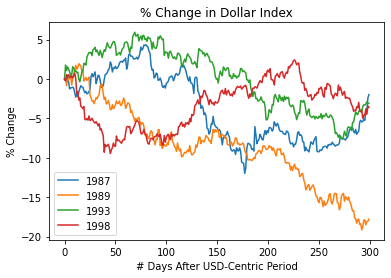

In [17]:
ax = df.plot()
plt.title('% Change in Dollar Index',fontsize=12)
ax.set_xlabel('# Days After USD-Centric Period')
ax.set_ylabel('% Change')

In [18]:
df = pd.DataFrame()
df['1987'] = ((datak['US10Y']['1987-04-16':].head(300)/datak['US10Y']['1987-04-16'])*100-100).values
df['1989'] = ((datak['US10Y']['1989-08-18':].head(300)/datak['US10Y']['1989-08-18'])*100-100).values
df['1993'] = ((datak['US10Y']['1993-09-20':].head(300)/datak['US10Y']['1993-09-20'])*100-100).values
df['1998'] = ((datak['US10Y']['1998-08-12':].head(300)/datak['US10Y']['1998-08-12'])*100-100).values

Text(0, 0.5, '% Change')

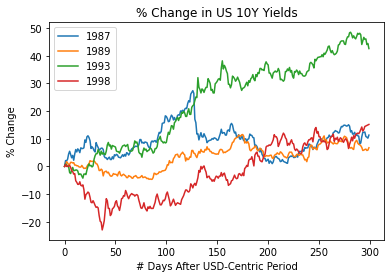

In [19]:
ax = df.plot()
plt.title('% Change in US 10Y Yields',fontsize=12)
ax.set_xlabel('# Days After USD-Centric Period')
ax.set_ylabel('% Change')

In [20]:
funds = pd.read_csv('FEDFUNDS.csv',index_col = [0],parse_dates = True)
funds = funds[4:]

Text(0.5, 1.0, 'Fed Funds Rate')

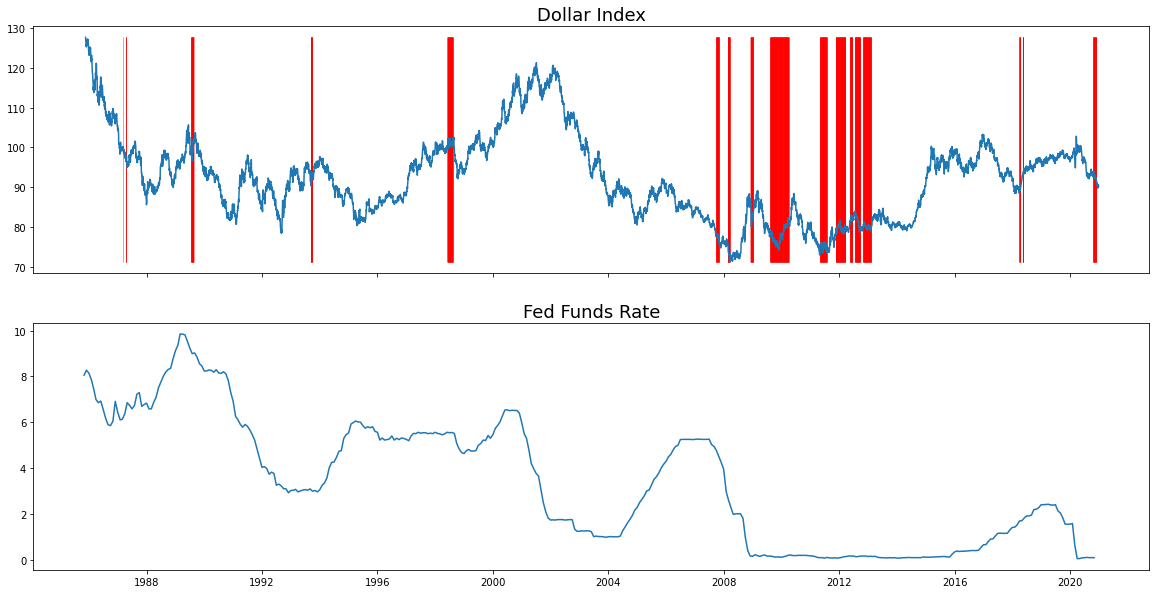

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,10), sharex=True)
axs[0].plot(datak['DXY'])
axs[0].set_title('Dollar Index',fontsize = 18)
axs[0].vlines(x = dates,ymin = min(datak['DXY']),ymax = max(data['DXY']),linewidth=1,alpha=0.4,color = 'Red')
axs[1].plot(funds)
axs[1].set_title('Fed Funds Rate',fontsize = 18)